<a href="https://colab.research.google.com/github/moashraf7474/Netflix-Movies-and-TV-Shows-Dataset-Analysis/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#Read the file
df=pd.read_csv('/content/netflix_titles.csv')

In [51]:
# Display the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [52]:
# Display concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [53]:
#Display number of rows and columns
df.shape

(8807, 12)

In [54]:
# Generate descriptive statistics
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [55]:
# Count the total number of duplicated rows
df.duplicated().sum()

np.int64(0)

In [56]:
# Calculate the number of missing values in each column
Missing_value = df.isnull().sum()

# Calculate the percentage of missing values in each column
Missing_per = (Missing_value / len(df)) * 100

Missing_per


,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [66]:

# Now fill missing values
df['director'] = df['director'].fillna('Not available')
df['cast']     = df['cast'].fillna('Not available')
df['country']  = df['country'].fillna('Unknown')
df['rating']   = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')
df=df.drop('date_added',axis=1)


In [67]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
release_year,0
rating,0
duration,0
listed_in,0


In [59]:
# Display 5 random rows
print(df.sample(5))

     show_id     type                       title          director  \
2584   s2585    Movie                    Material    Craig Freimond   
8458   s8459    Movie  The Place Beyond the Pines  Derek Cianfrance   
602     s603    Movie      The Karate Kid Part II  John G. Avildsen   
6258   s6259  TV Show                 Be-Be-Bears     Not available   
5649   s5650    Movie                   Headwinds     Jalil Lespert   

                                                   cast          country  \
2584  Vincent Ebrahim, Riaad Moosa, Joey Rasdien, De...     South Africa   
8458  Ryan Gosling, Bradley Cooper, Eva Mendes, Ray ...    United States   
602   Ralph Macchio, Pat Morita, Nobu McCarthy, Taml...    United States   
6258                Nataliya Medvedeva, Polina Kutepova           Russia   
5649  Benoît Magimel, Isabelle Carré, Antoine Duléry...  France, Belgium   

           date_added  release_year rating  duration  \
2584      May 1, 2020          2012  TV-14    94 min   
8458

/tmp/ipython-input-2841133812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


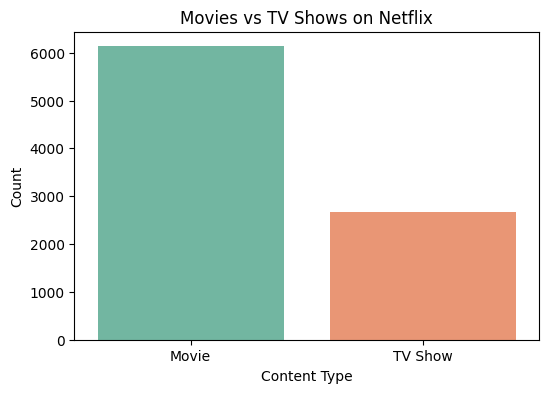

In [68]:
# Create a count plot to visualize the number of Movies vs TV Shows on Netflix
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

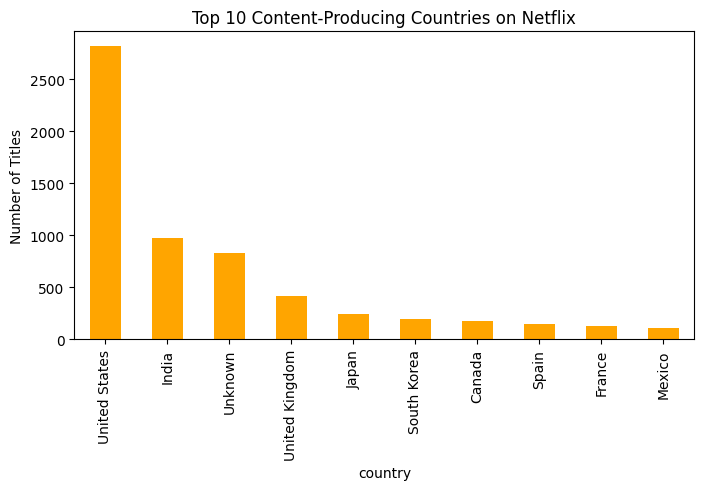

In [72]:
## Create a bar chart showing the top 10 countries producing content on Netflix
plt.figure(figsize=(8,4))
df['country'].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.ylabel("Number of Titles")
plt.show()

/tmp/ipython-input-1702338960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index, palette="coolwarm")


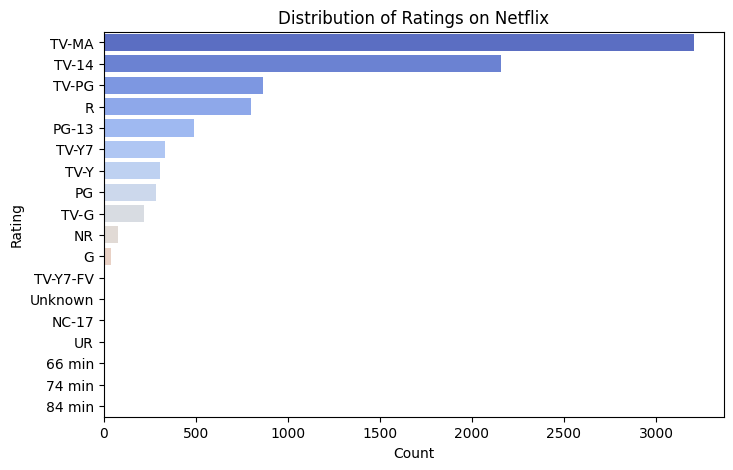

In [74]:
# Create a horizontal count plot to visualize the distribution of different ratings on Netflix
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()